Importing data from LOBO-Buoy server
====================================

---

Objectives:
-----------

    * Download data from LOBO server
    * (if needed) transform data into a format suitable for plotting
    * Plot time vs variable (e.g. temperature)
    * Turn your code into function for future (easier) use
    * Add docstrings and other relevant comments and documentation

Other relevant information:
---------------------------

* [LOBO's main page](http://lobo.satlantic.com/)
* ["LOBOviz" data download portal](http://lobo.satlantic.com/loboviz/)


time to work...

--------------------


Getting the data
----------------

* From the ["LOBOviz" webpage](http://lobo.satlantic.com/loboviz/), you can select a variable (e.g. temperature) and a date range sometime during the summer.
* Click "Plot data"
* Right-click on the button "Download tab separtaed values" and select "Copy link address"
* In python (i.e. Notebook or Spyder), "paste" the URL address in a variable


In [4]:
# URL quering the LOBO server for data (in this case, temperature data)
URL = 'http://lobo.satlantic.com/cgi-data/nph-data.cgi?min_date=20100602&max_date=20100630&y=fluorescence'


NOTE: You can see in the URL that the dates are included (i.e. min_date=20090610 and max_date=20090706) as well as the variable to query (i.e. y=temperature).

Now lets use "pandas" to actually dowload the data...

In [5]:
import pandas as pd

# Import data from LOBO server
data = pd.read_csv(URL,sep='\t')

---------------------------------

Exploring the data
------------------

Lets see what is in "data"...

In [7]:
data[:10]

,date [AST],fluorescence [micro g/l]
0,2010-06-02 00:00:00,1.74
1,2010-06-02 01:00:00,1.27
2,2010-06-02 02:00:00,1.12
3,2010-06-02 03:00:00,1.42
4,2010-06-02 04:00:00,1.49
5,2010-06-02 05:00:00,1.25
6,2010-06-02 06:00:00,1.33
7,2010-06-02 07:00:00,1.01
8,2010-06-02 08:00:00,0.98
9,2010-06-02 09:00:00,0.83


Now lets disect "data" a bit... lets find the title (or "keys") of its collumns...

In [8]:
data.keys()

Index(['date [AST]', 'fluorescence [micro g/l]'], dtype='object')

Lets see what is in the temperature column...

...and in the "date" column...

In [19]:
data['temperature [C]'][:10]

0    7.88
1    8.46
2    8.54
3    8.31
4    8.33
5    8.31
6    8.26
7    8.25
8    8.11
9    8.38
Name: temperature [C], dtype: float64

In [20]:
data['date [AST]'][:10]

0    2010-06-02 00:00:00
1    2010-06-02 01:00:00
2    2010-06-02 02:00:00
3    2010-06-02 03:00:00
4    2010-06-02 04:00:00
5    2010-06-02 05:00:00
6    2010-06-02 06:00:00
7    2010-06-02 07:00:00
8    2010-06-02 08:00:00
9    2010-06-02 09:00:00
Name: date [AST], dtype: object

...and the indices

In [21]:
data.index

RangeIndex(start=0, stop=696, step=1)

----------------------

Plotting
--------

Ok! Now lets start with a quick plot...

...but first a quick trick. You need to execute `%matplotlib inline` so that your plots appear in the Notebook.

In [22]:
%matplotlib inline

Ok, now lets do the plot...

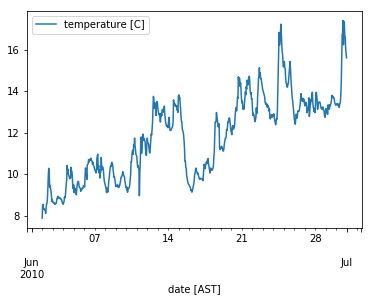

In [25]:
#import matplotlib.pyplot as plt

# ...just a quick plot
data.plot();

If we change the indices from "numbers" to "DatetimeIndex", then we can plot nicer!

In [24]:
# Change indices to DatetimeIndex objects
data.index = pd.DatetimeIndex(data['date [AST]'])

# Now that we made "date indices" we can drop the "date" column
data = data.drop('date [AST]',axis=1)

Lets see what happened....

In [58]:
data.index

DatetimeIndex(['2009-06-10 00:00:00', '2009-06-10 01:00:00',
               '2009-06-10 02:00:00', '2009-06-10 03:00:00',
               '2009-06-10 04:00:00', '2009-06-10 05:00:00',
               '2009-06-10 06:00:00', '2009-06-10 07:00:00',
               '2009-06-10 08:00:00', '2009-06-10 09:00:00',
               ...
               '2009-07-06 14:00:00', '2009-07-06 15:00:00',
               '2009-07-06 16:00:00', '2009-07-06 17:00:00',
               '2009-07-06 18:00:00', '2009-07-06 19:00:00',
               '2009-07-06 20:00:00', '2009-07-06 21:00:00',
               '2009-07-06 22:00:00', '2009-07-06 23:00:00'],
              dtype='datetime64[ns]', length=647, freq=None)

Lets plot again...

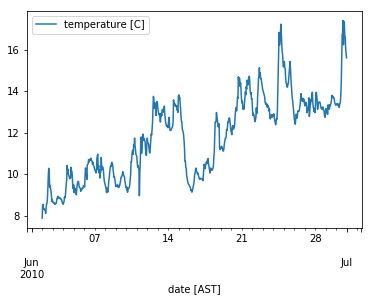

In [26]:
data.plot()

Lets make it prettier!

# ...a bit fancier plot
data.plot(style='-r',legend=False)
plt.title('Temperature from LOBO (Halifax, Canada)')
plt.ylabel('Temperature (oC)')
plt.xlabel('Dates')

Another way to plot (without pandas)

In [27]:

fig, ax =plt.subplots(1)
ax.plot_date(data.index, data['temperature [C]'], 'r-')
fig.autofmt_xdate(rotation=50)
plt.title('Temperature from LOBO (Halifax, Canada)')
plt.ylabel('Temperature (oC)')
plt.xlabel('Dates')
plt.show()

NameError: name 'plt' is not defined

------------------------

Putting it all together
-----------------------

Ok. NOw it is the time to put it all together... Note that I replaced the 'min_date' and 'max_date' arguments in the url for a couple of variables, so that we can easily change dates.

Text(0.5, 0, 'Dates')

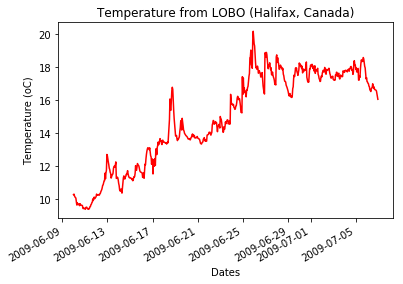

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Start and End dates
mindate = '20090610'
maxdate = '20090706'

# URL quering the LOBO server for data (in this case, temperature data)
URL = 'http://lobo.satlantic.com/cgi-data/nph-data.cgi?min_date='+mindate+'&max_date='+maxdate+'&y=temperature'

# Import data from LOBO server
data = pd.read_csv(URL,sep='\t')

# Change indices to DatetimeIndex objects
data.index = pd.DatetimeIndex(data['date [AST]'])

# Now that we made "date indices" we can drop the "date" column
data = data.drop('date [AST]',axis=1)

# ...a bit fancier plot
data.plot(style='-r',legend=False)
plt.title('Temperature from LOBO (Halifax, Canada)')
plt.ylabel('Temperature (oC)')
plt.xlabel('Dates')

------------------------------

# Making a function

Now it is time to make our code into a function, note that:

* At the begining, add: def NameOfFunction(arguments):
* At the end, add: return Output
* Indent contents
* NOTE that we inserted `mindate` and `maxdate` in the `URL` string!!! 

In [62]:
def load_temp(mindate,maxdate): 
    import pandas as pd
    import matplotlib.pyplot as plt

    # URL quering the LOBO server for data (in this case, temperature data)
    URL = 'http://lobo.satlantic.com/cgi-data/nph-data.cgi?min_date='+mindate+'&max_date='+maxdate+'&y=fluoresecense'

    # Import data from LOBO server
    data = pd.read_csv(URL,sep='\t')

    # Change indices to DatetimeIndex objects
    data.index = pd.DatetimeIndex(data['date [AST]'])
    
    # Now that we made "date indices" we can drop the "date" column
    data = data.drop('date [AST]',axis=1)

    # ...a bit fancier plot
    data.plot(style='-r',legend=False)
    plt.title('Temperature from LOBO (Halifax, Canada)')
    plt.ylabel('Temperature (oC)')
    plt.xlabel('Dates')
    plt.show()
    return data

Lets take our new function for a spin...

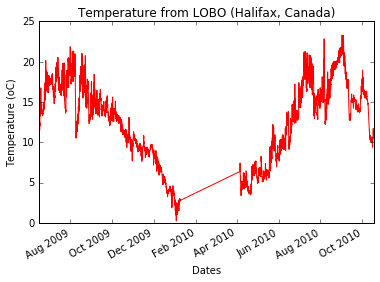

                     temperature [C]
2009-06-16 00:00:00            11.61
2009-06-16 01:00:00            11.59
2009-06-16 02:00:00            11.55
2009-06-16 03:00:00            11.30
2009-06-16 04:00:00            11.55
2009-06-16 05:00:00            11.57
2009-06-16 06:00:00            11.25
2009-06-16 07:00:00            11.63
2009-06-16 08:00:00            12.10
2009-06-16 09:00:00            12.06


In [65]:
mydata = load_temp('20090616','20101017')

print mydata[:10]

Some final touch-ups, like Documentation and a karg to prevent plotting... 

In [1]:
def load_temp(mindate,maxdate,plot=True):
    '''
    Downloads data from LOBO and makes a plot.
    
    Arguments:
        mindate (string): Start date
        maxdate (string): End date
        plot (boolean): If True, it produces a plot (default=True)
    
    Returns: 
        DataFrame and a plot (if `plot` argument = True)
    '''
    import pandas as pd
    import matplotlib.pyplot as plt

    # URL quering the LOBO server for data (in this case, temperature data)
    URL = 'http://lobo.satlantic.com/cgi-data/nph-data.cgi?min_date='+mindate+'&max_date='+maxdate+'&y=temperature'

    # Import data from LOBO server
    data = pd.read_csv(URL,sep='\t')

    # Change indices to DatetimeIndex objects
    data.index = pd.DatetimeIndex(data['date [AST]'])

    # Now that we made "date indices" we can drop the "date" column
    data = data.drop('date [AST]',axis=1)
    
    if plot==True:
        # ...a bit fancier plot
        data.plot(style='-r',legend=False)
        plt.title('Temperature from LOBO (Halifax, Canada)')
        plt.ylabel('Temperature (oC)')
        plt.xlabel('Dates')
        plt.show()
        
    return data

Lets see if we can see the documentation...


In [2]:
load_temp?

One last spin without making a plot:

In [3]:
mydata = load_temp('20090610','20090706',plot=False)

print mydata[:10]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(mydata[:10])? (<ipython-input-3-49e2f577b1f8>, line 3)

Last thing... create a new file (in this directory) called lobo_YourName.py .... copy-paste your new function, so we can use it later.